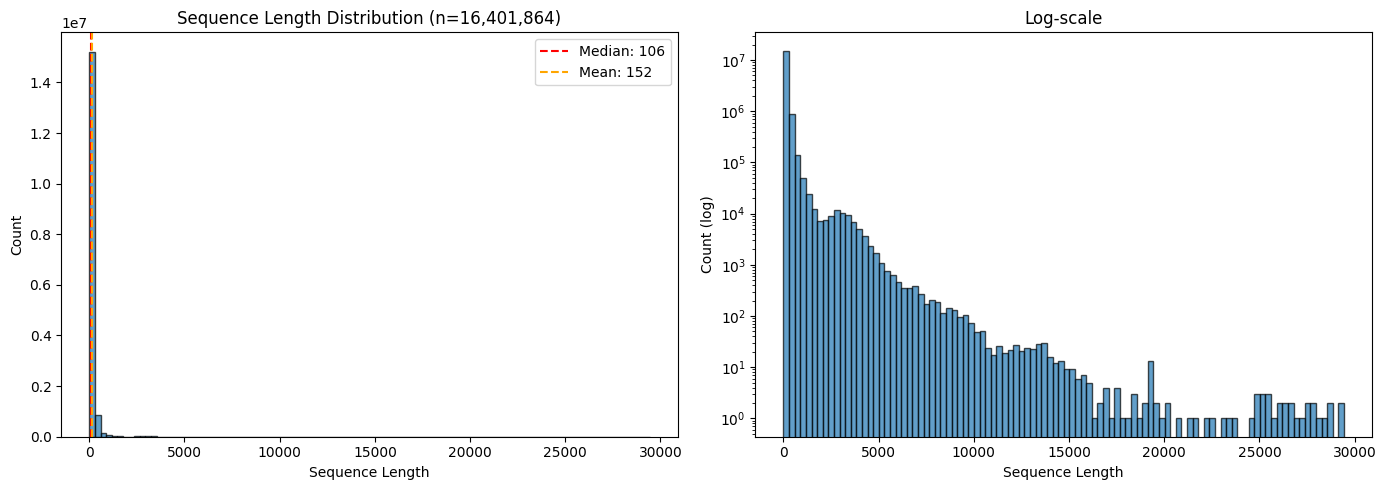


Percentiles:
  1%: 9
  5%: 24
  10%: 34
  25%: 63
  50%: 106
  75%: 168
  90%: 258
  95%: 346
  99%: 902

Min: 1, Max: 29438
Std: 280.2


In [3]:
import numpy as np
import matplotlib.pyplot as plt

max_hours_back = 24
lengths = np.load(f"../generated/bucket_lengths_train_{max_hours_back}.npy")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw histogram
axes[0].hist(lengths, bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Sequence Length')
axes[0].set_ylabel('Count')
axes[0].set_title(f'Sequence Length Distribution (n={len(lengths):,})')
axes[0].axvline(np.median(lengths), color='red', linestyle='--', label=f'Median: {np.median(lengths):.0f}')
axes[0].axvline(np.mean(lengths), color='orange', linestyle='--', label=f'Mean: {np.mean(lengths):.0f}')
axes[0].legend()

# Log-scale histogram (useful if heavily skewed)
axes[1].hist(lengths, bins=100, edgecolor='black', alpha=0.7)
axes[1].set_yscale('log')
axes[1].set_xlabel('Sequence Length')
axes[1].set_ylabel('Count (log)')
axes[1].set_title('Log-scale')

plt.tight_layout()
plt.show()

# Print percentiles to help choose bucket boundaries
print("\nPercentiles:")
for p in [1, 5, 10, 25, 50, 75, 90, 95, 99]:
    print(f"  {p}%: {np.percentile(lengths, p):.0f}")

print(f"\nMin: {lengths.min()}, Max: {lengths.max()}")
print(f"Std: {lengths.std():.1f}")